# Capacity allocation

## 0. Load libraries

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

from benchmarks.generator import get_revenue_behaviour, get_revenue_behaviour_deprecated
from benchmarks.robin_railway import RevenueMaximization
from benchmarks.utils import sns_box_plot, sns_line_plot, int_input, get_schedule_from_supply, infer_line_stations, get_services_by_tsp_df, plot_marey_chart
from src.entities import GSA, Solution

from robin.scraping.entities import SupplySaver
from robin.services_generator.entities import ServiceGenerator
from robin.supply.entities import Service, Supply

from pathlib import Path
from typing import Any, List, Mapping, Tuple, Union
import shutil

In [2]:
# Config files
supply_config_path = Path("../configs/generator/supply_config.yml")
demand_config_path = Path("../configs/demand/demand.yml")
generator_config_path = Path("../configs/generator/generator_config.yml")

# Save paths
generator_save_path = Path(f'../data/generator/supply_dummy.yml')
supply_save_path = '../configs/mealpy/'
robin_save_path = '../data/output/robin/'
figures = '../figures/'

# Clean save paths directories
if Path(generator_save_path.parent).exists():
    shutil.rmtree(generator_save_path.parent)

Path(generator_save_path.parent).mkdir(parents=True)

if Path(supply_save_path).exists():
    shutil.rmtree(supply_save_path)
    
Path(supply_save_path).mkdir(parents=True)

#if Path(figures).exists():
#    shutil.rmtree(figures)
#Path(figures).mkdir(parents=True)

In [9]:
seed = 21

if generator_config_path:
    n_services = int_input("Number of services to generate: ")
    generator = ServiceGenerator(supply_config_path=supply_config_path)
    _ = generator.generate(file_name=generator_save_path,
                           path_config=generator_config_path,
                           n_services=n_services,
                           seed=seed)
    print(f'Number of service requests generated: {len(_)}')

Number of service requests generated: 25


In [10]:
supply = Supply.from_yaml(generator_save_path)
tsp_df = get_services_by_tsp_df(supply.services)

print(tsp_df)

       Number of Services
RU2                     4
RU3                    10
RU1                     6
RU4                     5
Total                  25


In [11]:
print("Services: ", len(supply.services))
requested_schedule = get_schedule_from_supply(generator_save_path)
revenue_behaviour = get_revenue_behaviour_deprecated(supply)
lines = supply.lines
line = infer_line_stations(lines)

Services:  25


/Users/uclm/PycharmProjects/GSA_M/venv/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


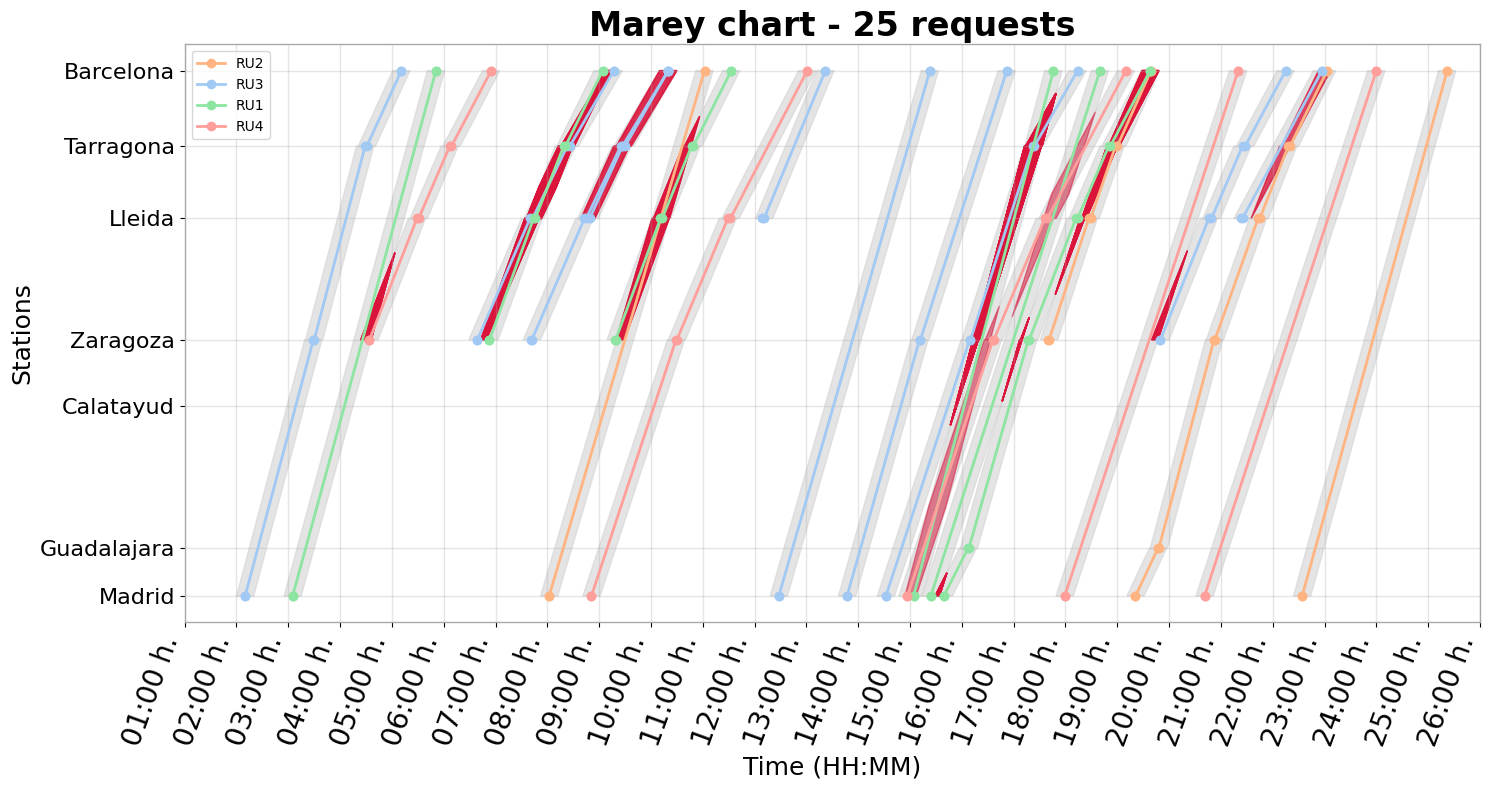

In [12]:
plot_marey_chart(requested_supply=supply,
                 colors_by_tsp=True, 
                 main_title="Marey chart - 25 requests",
                 plot_security_gaps=True,
                 security_gap=10,
                 save_path=Path('../reports/mealpy/marey_chart_requests_25.pdf'))

In [13]:
requested_schedule

{'0_2024-06-25-17.40': {'Zaragoza': [1060.0, 1061.0],
  'Lleida': [1107.0, 1109.0],
  'Tarragona': [1138.0, 1140.0],
  'Barcelona': [1179.0, 1179.0]},
 '1_2024-06-25-14.32': {'Madrid': [872.0, 872.0],
  'Zaragoza': [969.0, 970.0],
  'Tarragona': [1042.0, 1044.0],
  'Barcelona': [1094.0, 1094.0]},
 '2_2024-06-25-15.04': {'Madrid': [904.0, 904.0],
  'Barcelona': [1066.0, 1066.0]},
 '3_2024-06-25-13.47': {'Madrid': [827.0, 827.0],
  'Zaragoza': [911.0, 912.0],
  'Barcelona': [1012.0, 1012.0]},
 '4_2024-06-25-22.34': {'Madrid': [1354.0, 1354.0],
  'Barcelona': [1522.0, 1522.0]},
 '5_2024-06-25-12.09': {'Lleida': [729.0, 731.0], 'Barcelona': [802.0, 802.0]},
 '6_2024-06-25-2.10': {'Madrid': [130.0, 130.0],
  'Zaragoza': [209.0, 210.0],
  'Tarragona': [269.0, 271.0],
  'Barcelona': [311.0, 311.0]},
 '7_2024-06-25-8.02': {'Madrid': [482.0, 482.0], 'Barcelona': [662.0, 662.0]},
 '8_2024-06-25-8.51': {'Madrid': [531.0, 531.0],
  'Zaragoza': [629.0, 630.0],
  'Lleida': [689.0, 692.0],
  'Barcelo

In [14]:
revenue_behaviour

{'0_2024-06-25-17.40': {'canon': 242.0,
  'ru': '2',
  'k': 1.13,
  'dt_max_penalty': 33.88,
  'tt_max_penalty': 20.97},
 '1_2024-06-25-14.32': {'canon': 297.0,
  'ru': '3',
  'k': 1.17,
  'dt_max_penalty': 41.58,
  'tt_max_penalty': 25.74},
 '2_2024-06-25-15.04': {'canon': 148.5,
  'ru': '1',
  'k': 9.54,
  'dt_max_penalty': 20.79,
  'tt_max_penalty': 38.61},
 '3_2024-06-25-13.47': {'canon': 222.75,
  'ru': '3',
  'k': 3.44,
  'dt_max_penalty': 31.18,
  'tt_max_penalty': 28.96},
 '4_2024-06-25-22.34': {'canon': 132.0,
  'ru': '2',
  'k': 36.08,
  'dt_max_penalty': 18.48,
  'tt_max_penalty': 34.32},
 '5_2024-06-25-12.09': {'canon': 132.0,
  'ru': '3',
  'k': 4.51,
  'dt_max_penalty': 18.48,
  'tt_max_penalty': 34.32},
 '6_2024-06-25-2.10': {'canon': 297.0,
  'ru': '3',
  'k': 16.48,
  'dt_max_penalty': 41.58,
  'tt_max_penalty': 25.74},
 '7_2024-06-25-8.02': {'canon': 148.5,
  'ru': '2',
  'k': 63.11,
  'dt_max_penalty': 20.79,
  'tt_max_penalty': 38.61},
 '8_2024-06-25-8.51': {'canon'

In [15]:
services_by_ru = {}

for service in revenue_behaviour:
    if revenue_behaviour[service]['ru'] not in services_by_ru:
        services_by_ru[revenue_behaviour[service]['ru']] = 1
    else:
        services_by_ru[revenue_behaviour[service]['ru']] += 1

services_by_ru

{'2': 4, '3': 10, '1': 6, '4': 5}

In [17]:

capacity = {ru: services_by_ru[ru] / n_services * 100 for ru in services_by_ru}
capacity

{'2': 16.0, '3': 40.0, '1': 24.0, '4': 20.0}

In [27]:
import numpy as np

importance_dict = {}
for ru in services_by_ru:
    a = np.random.random(services_by_ru[ru])
    a /= a.sum()
    importance_dict[ru] = a

importance_dict

{'2': array([0.27558977, 0.2840399 , 0.20120185, 0.23916848]),
 '3': array([0.00055517, 0.09079849, 0.10279973, 0.14870622, 0.01644719,
        0.14387319, 0.10026903, 0.14682879, 0.1075553 , 0.1421669 ]),
 '1': array([0.08942056, 0.27382859, 0.14189889, 0.1284087 , 0.25852357,
        0.10791968]),
 '4': array([0.0916278 , 0.3165309 , 0.04534146, 0.21670829, 0.32979156])}

In [36]:
service_index = {}

for service in revenue_behaviour:
    if revenue_behaviour[service]['ru'] not in service_index:
        service_index[revenue_behaviour[service]['ru']] = 0
    else:
        service_index[revenue_behaviour[service]['ru']] += 1

    index = service_index[revenue_behaviour[service]['ru']]
    revenue_behaviour[service]['importance'] = importance_dict[revenue_behaviour[service]['ru']][index]

revenue_behaviour

{'0_2024-06-25-17.40': {'canon': 242.0,
  'ru': '2',
  'k': 1.13,
  'dt_max_penalty': 33.88,
  'tt_max_penalty': 20.97,
  'importance': 0.2755897690927692},
 '1_2024-06-25-14.32': {'canon': 297.0,
  'ru': '3',
  'k': 1.17,
  'dt_max_penalty': 41.58,
  'tt_max_penalty': 25.74,
  'importance': 0.0005551701235036856},
 '2_2024-06-25-15.04': {'canon': 148.5,
  'ru': '1',
  'k': 9.54,
  'dt_max_penalty': 20.79,
  'tt_max_penalty': 38.61,
  'importance': 0.08942056192570318},
 '3_2024-06-25-13.47': {'canon': 222.75,
  'ru': '3',
  'k': 3.44,
  'dt_max_penalty': 31.18,
  'tt_max_penalty': 28.96,
  'importance': 0.09079848956261186},
 '4_2024-06-25-22.34': {'canon': 132.0,
  'ru': '2',
  'k': 36.08,
  'dt_max_penalty': 18.48,
  'tt_max_penalty': 34.32,
  'importance': 0.28403989916156985},
 '5_2024-06-25-12.09': {'canon': 132.0,
  'ru': '3',
  'k': 4.51,
  'dt_max_penalty': 18.48,
  'tt_max_penalty': 34.32,
  'importance': 0.10279972745891552},
 '6_2024-06-25-2.10': {'canon': 297.0,
  'ru': '3

## 1. Mealpy

In [63]:
def jains_fairness_index(scheduled, capacities):
    """
    Calcula el índice de equidad de Jain ponderado, evaluando la equidad
    en función de la razón entre el recurso asignado y la capacidad de cada usuario.

    Parámetros:
        values (list o iterable de números): Recursos asignados a cada usuario.
        capacities (list o iterable de números): Capacidad o peso correspondiente a cada usuario.

    Retorna:
        float: El índice de equidad de Jain, que varía entre 0 y 1.
    """
    if len(scheduled) == 0:
        raise ValueError("La lista de recursos no puede estar vacía.")
    if len(scheduled) != len(capacities):
        raise ValueError("Las listas de recursos y capacidades deben tener la misma longitud.")

    # Calcular la razón (recurso/capacidad) para cada usuario.
    # Se controla que ninguna capacidad sea cero.
    ratios = []
    for v, c in zip(scheduled, capacities):
        if c == 0:
            raise ValueError("La capacidad no puede ser cero.")
        ratios.append(v / c)

    n = len(ratios)
    suma = sum(ratios)
    suma_cuadrados = sum(x ** 2 for x in ratios)

    if suma_cuadrados == 0:
        return 0

    indice = (suma ** 2) / (n * suma_cuadrados)
    return indice

recursos = [0, 0, 10, 0]
capacidades = [0.2, 0.3, 0.1, 0.4]
indice = jains_fairness_index(recursos, capacidades)
print("El índice de equidad de Jain es:", indice)

[0.0, 0.0, 100.0, 0.0]
El índice de equidad de Jain es: 0.25


In [175]:
from src.timetabling_problem import MPTT

mptt = MPTT(requested_schedule=requested_schedule,
            revenue_behaviour=revenue_behaviour,
            line=line,
            safe_headway=10)

In [176]:
from mealpy.evolutionary_based import GA

mp_algos = {"Genetic Algorithm": GA.BaseGA}

In [ ]:
from mealpy import IntegerVar

runs = 5
epochs = 50
pop_size = 20

seed_initializer = 29

# 0. Problem formulation
lb, ub = zip(*mptt.boundaries.real)

problem = {"obj_func": mptt.objective_function,
           "bounds": IntegerVar(lb=lb,
                              ub=ub),
           "minmax": "max",
           "save_population": True}

# 1. Iter algorithms
df_history = pd.DataFrame()
df_population = pd.DataFrame()

for algo_name, algo in mp_algos.items():
    
    # Re-initialize seed
    np.random.seed(seed_initializer)
    
    print(f"Running {algo_name}")
    for r in range(1, runs+1):
        print("\tRun: ", r)
        
        run_seed = np.random.randint(0, 1000)

        optimizer = algo(epoch=epochs, pop_size=pop_size)
        optimizer.solve(problem, seed=run_seed)

        # Build run history dataframe
        columns = ['Algo', 'Iteration', 'Fitness', 'ExecutionTime', 'Discrete', 'Real', 
                   'Diversity', 'Exploitation', 'Exploration']
        run_history = pd.DataFrame(columns=columns)
        
        # Save optimizer history to dataframe
        for i, data in enumerate(optimizer.history.list_global_best):
            mptt.update_schedule(data.solution)
            run_history.loc[i] = [algo_name,
                                  i, 
                                  data.target.fitness,
                                  optimizer.history.list_epoch_time[i],
                                  mptt.get_heuristic_schedule(),
                                  data.solution,
                                  optimizer.history.list_diversity[i],
                                  optimizer.history.list_exploitation[i],
                                  optimizer.history.list_exploration[i]]
    
        run_history.insert(0, "Run", r)
        df_history = pd.concat([df_history, run_history], axis=0)
        
        population_colums = [f'real_{i}' for i in range(pop_size)] + [f'discrete_{i}' for i in range(pop_size)]
        population_colums.insert(0, 'Iteration')
        run_population = pd.DataFrame(columns=population_colums)
        
        for i, pop_epoch in enumerate(optimizer.history.list_population):
            population_row = [i]
            real = []
            discrete = [] 
            for individual in pop_epoch:
                mptt.update_schedule(individual.solution)
                real.append(individual.solution)
                discrete.append(mptt.get_heuristic_schedule())
            
            population_row = [i, *real, *discrete]
            run_population.loc[len(run_population)] = population_row
        
        run_population.insert(0, "Run", r)
        run_population.insert(1, "Algo", algo_name)
        df_population = pd.concat([df_population, run_population], axis=0)    

Running Genetic Algorithm
	Run:  1


## 2. Results analysis

In [142]:
reports_path = Path('../reports/mealpy/')

In [143]:
df_history.to_csv(reports_path / 'df_history_equity.csv', sep=";", index=False)

In [144]:
df_population.to_csv(reports_path / 'df_population_equity.csv', sep=";", index=False)

In [148]:
df_history = pd.read_csv(reports_path / 'df_history_equity.csv', sep=";")
df_population = pd.read_csv(reports_path / 'df_population_equity.csv', sep=";")

In [149]:
df_history

,Run,Algo,Iteration,Fitness,ExecutionTime,Discrete,Real,Diversity,Exploitation,Exploration
0,1,Genetic Algorithm,0,3710.824980,0.112169,[ True True True True True True True Tr...,[1052. 1107. 1149. 876. 977. 1051. 901. 82...,3.002632,0.000000,100.000000
1,1,Genetic Algorithm,1,3774.141684,0.112186,[ True True True True True True True Tr...,[1053. 1104. 1148. 866. 974. 1051. 907. 82...,2.951754,1.694420,98.305580
2,1,Genetic Algorithm,2,3919.408750,0.107511,[ True True True True True True True Tr...,[1056. 1104. 1148. 866. 972. 1046. 907. 82...,2.831579,5.696757,94.303243
3,1,Genetic Algorithm,3,4300.844275,0.106976,[ True True True True True True True Tr...,[1056. 1104. 1148. 866. 972. 1046. 907. 81...,2.668421,11.130587,88.869413
4,1,Genetic Algorithm,4,4300.844275,0.106278,[ True True True True True True True Tr...,[1056. 1104. 1148. 866. 972. 1046. 907. 81...,2.443860,18.609407,81.390593
...,...,...,...,...,...,...,...,...,...,...
245,5,Genetic Algorithm,45,5071.276367,0.116329,[ True True True True True True True Tr...,[1059. 1108. 1149. 872. 972. 1046. 906. 82...,0.621930,79.897930,20.102070
246,5,Genetic Algorithm,46,5071.276367,0.119043,[ True True True True True True True Tr...,[1059. 1108. 1149. 872. 972. 1046. 906. 82...,0.574561,81.428976,18.571024
247,5,Genetic Algorithm,47,5071.276367,0.108430,[ True True True True True True True Tr...,[1059. 1108. 1149. 872. 972. 1046. 906. 82...,0.605263,80.436632,19.563368
248,5,Genetic Algorithm,48,5071.276367,0.108527,[ True True True True True True True Tr...,[1059. 1108. 1149. 872. 972. 1046. 906. 82...,0.639474,79.330876,20.669124


In [150]:
df_population

,Run,Algo,Iteration,real_0,real_1,real_2,real_3,real_4,real_5,real_6,...,discrete_10,discrete_11,discrete_12,discrete_13,discrete_14,discrete_15,discrete_16,discrete_17,discrete_18,discrete_19
0,1,Genetic Algorithm,0,[1051. 1104. 1149. 866. 974. 1045. 910. 81...,[1052. 1107. 1149. 876. 977. 1051. 901. 82...,[1064. 1107. 1148. 871. 973. 1046. 900. 82...,[1053. 1100. 1150. 878. 976. 1051. 900. 81...,[1053. 1107. 1148. 878. 973. 1051. 900. 81...,[1064. 1100. 1150. 871. 976. 1046. 900. 82...,[1069. 1100. 1150. 878. 976. 1046. 900. 82...,...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...
1,1,Genetic Algorithm,1,[1061. 1106. 1144. 870. 972. 1048. 898. 82...,[1053. 1104. 1149. 879. 974. 1051. 908. 82...,[1053. 1104. 1148. 866. 974. 1051. 907. 82...,[1064. 1100. 1150. 871. 976. 1046. 900. 82...,[1052. 1108. 1148. 871. 977. 1045. 910. 81...,[1051. 1107. 1149. 879. 976. 1051. 900. 81...,[1051. 1105. 1149. 879. 977. 1051. 910. 81...,...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...
2,1,Genetic Algorithm,2,[1053. 1107. 1148. 871. 974. 1051. 900. 81...,[1052. 1107. 1149. 878. 976. 1051. 900. 81...,[1053. 1100. 1150. 878. 973. 1051. 900. 81...,[1051. 1104. 1149. 879. 976. 1045. 910. 82...,[1053. 1104. 1149. 873. 974. 1051. 900. 82...,[1052. 1107. 1149. 879. 974. 1051. 908. 81...,[1051. 1105. 1149. 879. 977. 1051. 910. 81...,...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...
3,1,Genetic Algorithm,3,[1053. 1106. 1149. 871. 976. 1051. 900. 81...,[1053. 1104. 1148. 866. 974. 1051. 907. 81...,[1051. 1104. 1149. 879. 976. 1045. 910. 82...,[1056. 1105. 1144. 870. 972. 1046. 907. 82...,[1056. 1105. 1149. 870. 972. 1046. 910. 81...,[1052. 1107. 1149. 878. 972. 1051. 907. 81...,[1056. 1104. 1148. 866. 972. 1046. 907. 81...,...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...
4,1,Genetic Algorithm,4,[1056. 1106. 1144. 870. 972. 1046. 907. 82...,[1052. 1105. 1144. 870. 974. 1051. 900. 82...,[1056. 1106. 1144. 870. 972. 1046. 900. 82...,[1052. 1106. 1144. 870. 974. 1046. 900. 82...,[1053. 1106. 1149. 871. 976. 1051. 900. 82...,[1052. 1106. 1144. 870. 974. 1051. 900. 81...,[1056. 1104. 1149. 866. 972. 1046. 910. 81...,...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True

In [151]:
columns_to_transform = df_history.filter(like="Real").columns

df_history[columns_to_transform] = df_history[columns_to_transform].apply(
    lambda col: col.map(lambda x: np.array(list(map(float, x[1:-1].split())), dtype=np.int32))
)

df_history.head()

,Run,Algo,Iteration,Fitness,ExecutionTime,Discrete,Real,Diversity,Exploitation,Exploration
0,1,Genetic Algorithm,0,3710.824980,0.112169,[ True True True True True True True Tr...,"[1052, 1107, 1149, 876, 977, 1051, 901, 828, 9...",3.002632,0.000000,100.000000
1,1,Genetic Algorithm,1,3774.141684,0.112186,[ True True True True True True True Tr...,"[1053, 1104, 1148, 866, 974, 1051, 907, 825, 9...",2.951754,1.694420,98.305580
2,1,Genetic Algorithm,2,3919.408750,0.107511,[ True True True True True True True Tr...,"[1056, 1104, 1148, 866, 972, 1046, 907, 822, 9...",2.831579,5.696757,94.303243
3,1,Genetic Algorithm,3,4300.844275,0.106976,[ True True True True True True True Tr...,"[1056, 1104, 1148, 866, 972, 1046, 907, 819, 9...",2.668421,11.130587,88.869413
4,1,Genetic Algorithm,4,4300.844275,0.106278,[ True True True True True True True Tr...,"[1056, 1104, 1148, 866, 972, 1046, 907, 819, 9...",2.443860,18.609407,81.390593


In [152]:
columns_to_transform = df_history.filter(like="Discrete").columns

df_history[columns_to_transform] = df_history[columns_to_transform].apply(
    lambda col: col.map(lambda x: np.array(list(map(lambda s: True if s == "True" else False, x[1:-1].split())), dtype=bool))
)

df_history.head()

,Run,Algo,Iteration,Fitness,ExecutionTime,Discrete,Real,Diversity,Exploitation,Exploration
0,1,Genetic Algorithm,0,3710.824980,0.112169,"[True, True, True, True, True, True, True, Tru...","[1052, 1107, 1149, 876, 977, 1051, 901, 828, 9...",3.002632,0.000000,100.000000
1,1,Genetic Algorithm,1,3774.141684,0.112186,"[True, True, True, True, True, True, True, Tru...","[1053, 1104, 1148, 866, 974, 1051, 907, 825, 9...",2.951754,1.694420,98.305580
2,1,Genetic Algorithm,2,3919.408750,0.107511,"[True, True, True, True, True, True, True, Tru...","[1056, 1104, 1148, 866, 972, 1046, 907, 822, 9...",2.831579,5.696757,94.303243
3,1,Genetic Algorithm,3,4300.844275,0.106976,"[True, True, True, True, True, True, True, Tru...","[1056, 1104, 1148, 866, 972, 1046, 907, 819, 9...",2.668421,11.130587,88.869413
4,1,Genetic Algorithm,4,4300.844275,0.106278,"[True, True, True, True, True, True, True, Tru...","[1056, 1104, 1148, 866, 972, 1046, 907, 819, 9...",2.443860,18.609407,81.390593


In [153]:
columns_to_transform = df_population.filter(like="real_").columns

df_population[columns_to_transform] = df_population[columns_to_transform].apply(
    lambda col: col.map(lambda x: list(map(float, x[1:-1].split())))
)

df_population.head()

,Run,Algo,Iteration,real_0,real_1,real_2,real_3,real_4,real_5,real_6,...,discrete_10,discrete_11,discrete_12,discrete_13,discrete_14,discrete_15,discrete_16,discrete_17,discrete_18,discrete_19
0,1,Genetic Algorithm,0,"[1051.0, 1104.0, 1149.0, 866.0, 974.0, 1045.0,...","[1052.0, 1107.0, 1149.0, 876.0, 977.0, 1051.0,...","[1064.0, 1107.0, 1148.0, 871.0, 973.0, 1046.0,...","[1053.0, 1100.0, 1150.0, 878.0, 976.0, 1051.0,...","[1053.0, 1107.0, 1148.0, 878.0, 973.0, 1051.0,...","[1064.0, 1100.0, 1150.0, 871.0, 976.0, 1046.0,...","[1069.0, 1100.0, 1150.0, 878.0, 976.0, 1046.0,...",...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...
1,1,Genetic Algorithm,1,"[1061.0, 1106.0, 1144.0, 870.0, 972.0, 1048.0,...","[1053.0, 1104.0, 1149.0, 879.0, 974.0, 1051.0,...","[1053.0, 1104.0, 1148.0, 866.0, 974.0, 1051.0,...","[1064.0, 1100.0, 1150.0, 871.0, 976.0, 1046.0,...","[1052.0, 1108.0, 1148.0, 871.0, 977.0, 1045.0,...","[1051.0, 1107.0, 1149.0, 879.0, 976.0, 1051.0,...","[1051.0, 1105.0, 1149.0, 879.0, 977.0, 1051.0,...",...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...
2,1,Genetic Algorithm,2,"[1053.0, 1107.0, 1148.0, 871.0, 974.0, 1051.0,...","[1052.0, 1107.0, 1149.0, 878.0, 976.0, 1051.0,...","[1053.0, 1100.0, 1150.0, 878.0, 973.0, 1051.0,...","[1051.0, 1104.0, 1149.0, 879.0, 976.0, 1045.0,...","[1053.0, 1104.0, 1149.0, 873.0, 974.0, 1051.0,...","[1052.0, 1107.0, 1149.0, 879.0, 974.0, 1051.0,...","[1051.0, 1105.0, 1149.0, 879.0, 977.0, 1051.0,...",...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...
3,1,Genetic Algorithm,3,"[1053.0, 1106.0, 1149.0, 871.0, 976.0, 1051.0,...","[1053.0, 1104.0, 1148.0, 866.0, 974.0, 1051.0,...","[1051.0, 1104.0, 1149.0, 879.0, 976.0, 1045.0,...","[1056.0, 1105.0, 1144.0, 870.0, 972.0, 1046.0,...","[1056.0, 1105.0, 1149.0, 870.0, 972.0, 1046.0,...","[1052.0, 1107.0, 1149.0, 878.0, 972.0, 1051.0,...","[1056.0, 1104.0, 1148.0, 866.0, 972.0, 1046.0,...",...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr...
4,1,Genetic Algorithm,4,"[1056.0, 1106.0, 1144.0, 870.0, 972.0, 1046.0,...","[1052.0, 1105.0, 1144.0, 870.0, 974.0, 1051.0,...","[1056.0, 1106.0, 1144.0, 870.0, 972.0, 1046.0,...","[1052.0, 1106.0, 1144.0, 870.0, 974.0, 1046.0,...","[1053.0, 1106.0, 1149.0, 871.0, 976.0, 1051.0,...","[1052.0, 1106.0, 1144.0, 870.0, 974.0, 1051.0,...","[1056.0, 1104.0, 1149.0, 866.0, 972.0, 1046.0,...",...,[ True True True True True True True Tr...,[ True True True True True True True Tr...,[ True True True True True True True Tr..

In [154]:
from src.timetabling_problem import MPTT

# Define new revenue maximization object for results analysis
mptt = MPTT(requested_schedule=requested_schedule,
            revenue_behaviour=revenue_behaviour,
            line=line,
            safe_headway=10)

top_3_algos = ("Genetic Algorithm",
               "Particle Swarm Optimization",
               "Ant Colony Optimization Continuous (ACOR)")

# Create dataframe with fitness values for each individual of the population
df_pop = df_population[df_population['Algo'].isin(top_3_algos)]

set_filtered_algos = set(df_pop["Algo"])
print(f"Filtered algos: {set_filtered_algos}")

df_pop = df_pop.replace(r'\n', ' ', regex=True)

# Drop unnecessary columns
df_pop.drop(columns=[col for col in df_pop.columns if 'discrete' in col], inplace=True)

# Function to compute fitness
def fitness_from_real(x: np.array) -> float:
    return mptt.objective_function(x)

# Iterate through the dataframe and apply the function with progress feedback
real_columns = df_pop.columns[df_pop.columns.str.contains('real_')]
previous_run, previous_algo = None, None

for index, row in df_pop.iterrows():
    current_run = row['Run']
    current_algo = row['Algo']

    # Print message if there's a change in 'Run' or 'Algo'
    if current_run != previous_run or current_algo != previous_algo:
        print(f"Processing new combination: Run = {current_run}, Algo = {current_algo}")
        previous_run, previous_algo = current_run, current_algo

    # Apply the fitness function to the real columns
    df_pop.loc[index, real_columns] = row[real_columns].map(fitness_from_real)

print("Processing completed.")
df_pop

Filtered algos: {'Genetic Algorithm'}
Processing new combination: Run = 1, Algo = Genetic Algorithm
Processing new combination: Run = 2, Algo = Genetic Algorithm
Processing new combination: Run = 3, Algo = Genetic Algorithm
Processing new combination: Run = 4, Algo = Genetic Algorithm
Processing new combination: Run = 5, Algo = Genetic Algorithm
Processing completed.


,Run,Algo,Iteration,real_0,real_1,real_2,real_3,real_4,real_5,real_6,...,real_10,real_11,real_12,real_13,real_14,real_15,real_16,real_17,real_18,real_19
0,1,Genetic Algorithm,0,2635.760318,3710.82498,3079.571754,2805.899672,3005.30663,2785.292576,3040.044636,...,2699.084691,3255.824117,3127.57885,2525.870405,3393.032544,3265.399835,3087.738562,2636.950934,2901.372375,2621.486267
1,1,Genetic Algorithm,1,3020.169367,3309.777704,3774.141684,2785.292576,3200.59566,2776.297807,3127.57885,...,2986.327369,2842.732248,2891.953649,3475.238054,2733.583696,3265.399835,3714.029742,2963.588767,2901.372375,3004.443972
2,1,Genetic Algorithm,2,3744.719619,3225.01673,2819.956292,3296.375735,3474.660945,3746.041291,3127.57885,...,3540.621911,2785.292576,3461.544208,3207.328275,3242.438863,3051.086453,3475.238054,3919.40875,3050.004306,3872.75859
3,1,Genetic Algorithm,3,3495.946108,3461.544208,3296.375735,3688.00261,3435.950031,3558.500043,4300.844275,...,3285.8022,3973.260372,3315.108383,3127.57885,3344.760692,3581.277909,3028.412269,3540.621911,3294.178883,3115.315618
4,1,Genetic Algorithm,4,3668.036869,3301.014332,3475.238054,3384.748816,3794.540355,3540.685478,3581.277909,...,3344.760692,3645.928423,3359.612278,3344.760692,3613.675383,3540.621911,3461.544208,3296.375735,3115.315618,4045.269413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,5,Genetic Algorithm,45,5023.612071,5031.393982,5071.276367,5032.170569,5049.243836,5026.178005,5042.737734,...,5044.409394,5028.331168,5058.83439,5039.996724,5001.347906,5038.319187,5032.170569,5053.84686,5054.372383,5001.347906
246,5,Genetic Algorithm,46,5031.393982,5051.890246,4990.31337,4997.987654,5034.189235,5061.58519,5026.178005,...,5049.243836,5010.244195,5032.170569,5028.331168,5031.393982,5054.435385,5026.178005,5023.525026,5032.170569,5063.349726
247,5,Genetic Algorithm,47,5043.635068,5042.737734,5061.36384,5040.749616,5031.393982,5023.525026,4997.987654,...,4997.987654,5032.170569,5032.170569,5046.472054,5026.178005,5042.737734,4997.987654,5051.890246,5032.170569,4990.31337
248,5,Genetic Algorithm,48,5040.749616,4990.31337,5032.170569,5032.170569,5055.598802,5041.34928,5033.471971,...,5058.044516,5016.29734,4990.31337,5045.955369,5052.380826,5041.660053,5061.36384,5026.178005,5029.326942,4997.987654


In [155]:
# Save df_pop
df_pop.to_csv(reports_path / 'df_pop_equity.csv', sep=";", index=False)

In [156]:
# Prepare dataframe for boxplot
rows = []
for row in df_pop.iterrows():
    run = row[1]['Run']
    iteration = row[1]['Iteration']
    algo = row[1]['Algo']
    
    for individual in [ind_name for ind_name in row[1].index if 'real_' in ind_name]:
        fitness = row[1][individual]
        rows.append({'Run': run, 'Iteration': iteration, 'Fitness': fitness, 'Algorithm': algo, 'Individual': f'ID_{individual}'})
        
df_boxplot = pd.DataFrame.from_dict(rows, orient='columns')
df_boxplot

,Run,Iteration,Fitness,Algorithm,Individual
0,1,0,2635.760318,Genetic Algorithm,ID_real_0
1,1,0,3710.824980,Genetic Algorithm,ID_real_1
2,1,0,3079.571754,Genetic Algorithm,ID_real_2
3,1,0,2805.899672,Genetic Algorithm,ID_real_3
4,1,0,3005.306630,Genetic Algorithm,ID_real_4
...,...,...,...,...,...
4995,5,49,4990.313370,Genetic Algorithm,ID_real_15
4996,5,49,5033.471971,Genetic Algorithm,ID_real_16
4997,5,49,5025.840348,Genetic Algorithm,ID_real_17
4998,5,49,5072.276995,Genetic Algorithm,ID_real_18


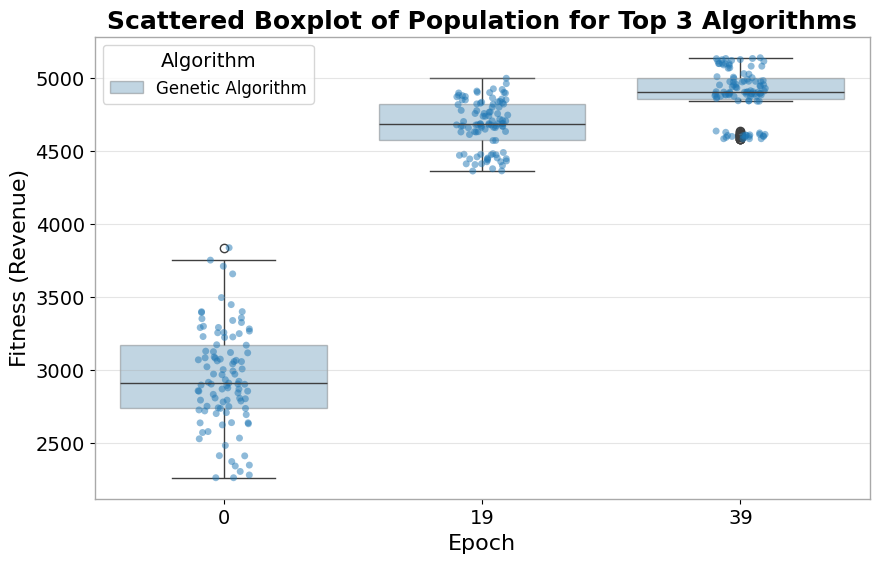

In [157]:
# Filter df, only rows with 'Iteration' values included in [0, .., 49]
df_boxplot_filtered = df_boxplot[df_boxplot['Iteration'].isin([0, 19, 39, 59, 79, 99])]

sns_box_plot(df=df_boxplot_filtered,
             x_data='Iteration',
             y_data='Fitness',
             hue='Algorithm',
             title="Scattered Boxplot of Population for Top 3 Algorithms",
             x_label="Epoch",
             y_label="Fitness (Revenue)",
             save_path=Path('../reports/mealpy/scattered_boxplot_top_3_25.pdf'))

In [158]:
# Table with results by run

sm = RevenueMaximization(requested_schedule=requested_schedule,
                         revenue_behaviour=revenue_behaviour,
                         line=line,
                         safe_headway=10)

service_tsps = {service.id: service.tsp.name for service in supply.services}
columns = ['Algorithm', 'Run', 'Revenue', 'Execution Time (s.)', 'Scheduled Trains', 'Delta DT (min.)', 'Delta TT (min.)']
columns += set(service_tsps.values())

summary_df = pd.DataFrame(columns=columns)

algo_grouped_df = df_history.groupby('Algo')

for algo_group in algo_grouped_df:
    run_grouped_df = algo_group[1].groupby('Run')
    for group in run_grouped_df.groups:
        run = run_grouped_df.get_group(group)['Run'].iloc[-1]
        revenue = np.round(run_grouped_df.get_group(group)['Fitness'].iloc[-1], 2)
        execution_time = np.round(run_grouped_df.get_group(group)['ExecutionTime'].sum(), 2)
        scheduled_trains_array = run_grouped_df.get_group(group)['Discrete'].iloc[-1]
        scheduled_trains = int(sum(run_grouped_df.get_group(group)['Discrete'].iloc[-1]))
        real_solution = run_grouped_df.get_group(group)['Real'].iloc[-1]
        sm.update_schedule(Solution(real=real_solution, discrete=scheduled_trains))
        delta_dt = 0.0
        delta_tt = 0.0
        services_by_tsp = {tsp: 0 for tsp in service_tsps.values()}
        for i, service in enumerate(sm.requested_schedule):
            if not scheduled_trains_array[i]:
                continue
            departure_station = list(sm.requested_schedule[service].keys())[0]
            delta_dt += abs(sm.updated_schedule[service][departure_station][1] -
                            sm.requested_schedule[service][departure_station][1])
            for j, stop in enumerate(sm.requested_schedule[service].keys()):
                if j == 0 or j == len(sm.requested_schedule[service]) - 1:
                    continue
                delta_tt += abs(sm.updated_schedule[service][stop][1] - sm.requested_schedule[service][stop][1])
    
            service_tsp = service_tsps[service]
            services_by_tsp[service_tsp] += 1
    
        percentages_by_tsp = {}
        for tsp in services_by_tsp:
            percentages_by_tsp[tsp] = f"{np.round(services_by_tsp[tsp] / tsp_df.loc[tsp, 'Number of Services'] * 100, 2)} %"
        row_data =  [algo_group[0], run, revenue, execution_time, 
                     scheduled_trains, np.round(delta_dt, 2), np.round(delta_tt, 2), *list(percentages_by_tsp.values())]
        summary_df.loc[len(summary_df)] = row_data

summary_df = summary_df.sort_values('Revenue', ascending=False)
display(summary_df)
print()

,Algorithm,Run,Revenue,Execution Time (s.),Scheduled Trains,Delta DT (min.),Delta TT (min.),RU3,RU2,RU1,RU4
1,Genetic Algorithm,2,5215.74,5.38,25,59.0,119.0,100.0 %,100.0 %,100.0 %,100.0 %
4,Genetic Algorithm,5,5072.28,5.55,25,80.0,133.0,100.0 %,100.0 %,100.0 %,100.0 %
3,Genetic Algorithm,4,5038.15,5.50,25,91.0,138.0,100.0 %,100.0 %,100.0 %,100.0 %
0,Genetic Algorithm,1,4979.89,5.36,25,88.0,140.0,100.0 %,100.0 %,100.0 %,100.0 %
2,Genetic Algorithm,3,4846.08,5.36,25,93.0,178.0,100.0 %,100.0 %,100.0 %,100.0 %


In [37]:
summary_df.to_latex()

'\\begin{tabular}{llrrrrrrllll}\n\\toprule\n & Algorithm & Run & Revenue & Execution Time (s.) & Scheduled Trains & Delta DT (min.) & Delta TT (min.) & RU1 & RU4 & RU2 & RU3 \\\\\n\\midrule\n21 & Genetic Algorithm & 2 & 4407.020000 & 25.410000 & 18 & 20.000000 & 20.000000 & 50.0 % & 80.0 % & 50.0 % & 100.0 % \\\\\n22 & Genetic Algorithm & 3 & 4397.000000 & 25.260000 & 18 & 22.000000 & 14.000000 & 50.0 % & 90.0 % & 33.33 % & 100.0 % \\\\\n24 & Genetic Algorithm & 5 & 4394.210000 & 26.330000 & 19 & 34.000000 & 37.000000 & 50.0 % & 80.0 % & 66.67 % & 100.0 % \\\\\n23 & Genetic Algorithm & 4 & 4359.110000 & 25.010000 & 18 & 27.000000 & 26.000000 & 50.0 % & 80.0 % & 50.0 % & 100.0 % \\\\\n20 & Genetic Algorithm & 1 & 4348.730000 & 24.980000 & 18 & 22.000000 & 33.000000 & 50.0 % & 80.0 % & 50.0 % & 100.0 % \\\\\n35 & Particle Swarm Optimization & 1 & 3972.600000 & 25.940000 & 17 & 48.000000 & 92.000000 & 50.0 % & 80.0 % & 33.33 % & 100.0 % \\\\\n37 & Particle Swarm Optimization & 3 & 3951.24

In [159]:
# Global status

def get_global_status(df: pd.DataFrame):
    algo_grouped_df = df.groupby('Algo')

    for algo_group in algo_grouped_df:
        run_grouped_df = algo_group[1].groupby('Run')
        
        print(f"Global {algo_group[0]} status:")
        
        # Execution time (mean and std.)
        run_times = run_grouped_df['ExecutionTime'].last()
        print(f'\tTotal execution time: {round(run_times.sum(), 4)} s.')
        print(f'\tExecution Time (by run) - Mean: {round(run_times.mean(), 4)} s. - Std: {round(run_times.std(), 4)} s.')
        
        # Revenue (mean and std.)
        run_revenues = run_grouped_df['Fitness'].last()
        print(f'\tRevenue - Mean: {round(run_revenues.mean(), 4)} - Std: {round(run_revenues.std(), 4)}')
        
        # Scheduled trains (mean and std.)
        run_trains = run_grouped_df['Discrete'].last().apply(sum)
        print(f'\tScheduled Trains - Mean: {np.round(run_trains.mean())} - Std: {np.round(run_trains.std())}')
        
        max_revenue = sum([sm.revenue[service]['canon'] for service in sm.revenue])
        print(f"\tMax Revenue: {max_revenue} - WARNING!: Scheduling all services could not be feasible")
        print()
        
get_global_status(df_history)

Global Genetic Algorithm status:
	Total execution time: 0.555 s.
	Execution Time (by run) - Mean: 0.111 s. - Std: 0.0056 s.
	Revenue - Mean: 5030.43 - Std: 134.8055
	Scheduled Trains - Mean: 25.0 - Std: 0.0
	Max Revenue: 5824.5 - WARNING!: Scheduling all services could not be feasible



In [160]:

def get_global_status_as_dataframe(df: pd.DataFrame):
    algo_grouped_df = df.groupby('Algo')
    
    results = []
    for algo_name, algo_group in algo_grouped_df:
        run_grouped_df = algo_group.groupby('Run')
        
        run_times = run_grouped_df['ExecutionTime'].sum()
        
        run_revenues = run_grouped_df['Fitness'].last()
        run_trains = run_grouped_df['Discrete'].last().apply(sum)
        
        result = {
            'Algorithm': algo_name,
            'Mean Execution Time (seconds)': round(run_times.mean(), 2),
            'Std Execution Time (seconds)': round(run_times.std(), 2),
            'Mean Fitness (revenue)': round(run_revenues.mean(), 2),
            'Std Fitness (revenue)': round(run_revenues.std(), 2),
            'Mean Scheduled Trains': int(round(run_trains.mean())),
            'Std Scheduled Trains': int(round(run_trains.std()))
        }
        
        results.append(result)
    
    results_df = pd.DataFrame(results)
    
    # Short by column 'Mean Fitness' 
    results_df = results_df.sort_values(by='Mean Fitness (revenue)', ascending=False).reset_index(drop=True)
    return results_df

results_df = get_global_status_as_dataframe(df_history)
results_df

,Algorithm,Mean Execution Time (seconds),Std Execution Time (seconds),Mean Fitness (revenue),Std Fitness (revenue),Mean Scheduled Trains,Std Scheduled Trains
0,Genetic Algorithm,5.43,0.09,5030.43,134.81,25,0


In [40]:
results_df.to_latex()

'\\begin{tabular}{llrrrrrr}\n\\toprule\n & Algorithm & Mean Execution Time (seconds) & Std Execution Time (seconds) & Mean Fitness (revenue) & Std Fitness (revenue) & Mean Scheduled Trains & Std Scheduled Trains \\\\\n\\midrule\n0 & Genetic Algorithm & 25.400000 & 0.550000 & 4381.210000 & 25.630000 & 18 & 0 \\\\\n1 & Particle Swarm Optimization & 25.140000 & 0.480000 & 3845.480000 & 114.460000 & 17 & 0 \\\\\n2 & Ant Colony Optimization Continuous (ACOR) & 15.110000 & 0.080000 & 3691.890000 & 80.840000 & 18 & 0 \\\\\n3 & Whale Optimization Algorithm & 25.010000 & 0.290000 & 3554.280000 & 30.630000 & 15 & 0 \\\\\n4 & Differential Evolution & 25.140000 & 0.150000 & 3463.480000 & 238.220000 & 17 & 1 \\\\\n5 & Artificial Bee Colony & 50.030000 & 0.260000 & 3438.390000 & 83.710000 & 17 & 1 \\\\\n6 & Covariance Matrix Adaptation Evolution Strategy & 52.130000 & 1.880000 & 3230.210000 & 141.930000 & 15 & 0 \\\\\n7 & Grey Wolf Optimizer & 24.790000 & 0.090000 & 3112.630000 & 399.350000 & 16 & 1

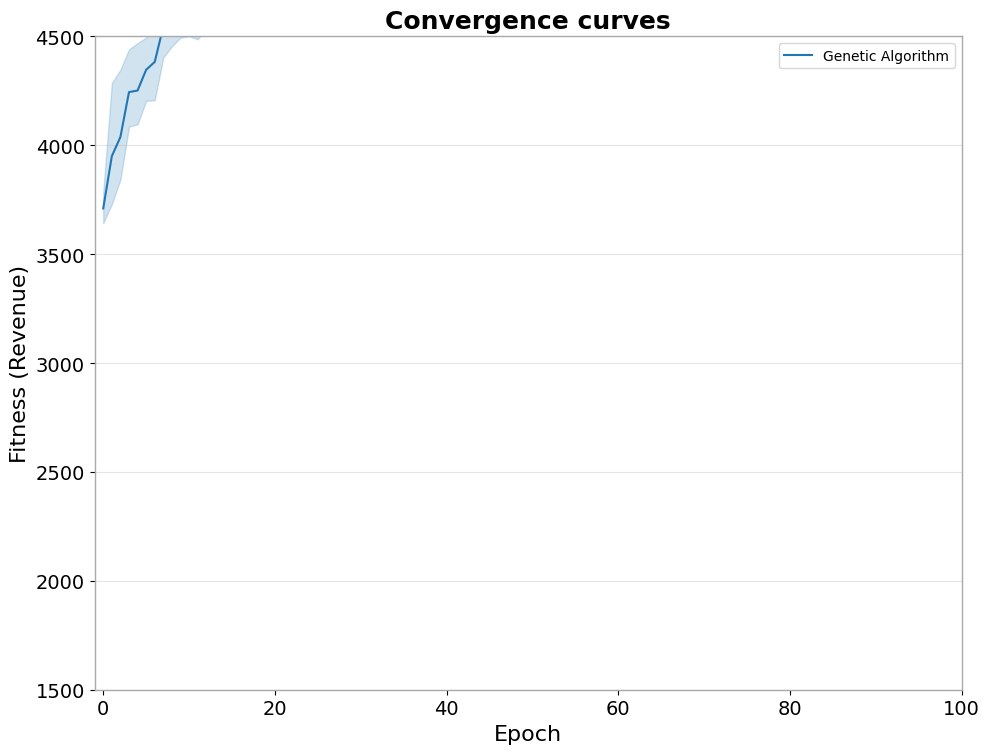

In [161]:
sns_line_plot(df=df_history,
              x_data="Iteration",
              y_data="Fitness",
              hue="Algo",
              title="Convergence curves",
              x_label="Epoch",
              y_label="Fitness (Revenue)",
              x_limit=(-1, 100),
              y_limit=(1500,4500),
              save_path=Path('../reports/mealpy/mealpy_convergence_5_seed.pdf'),
              fig_size=(10, 9))

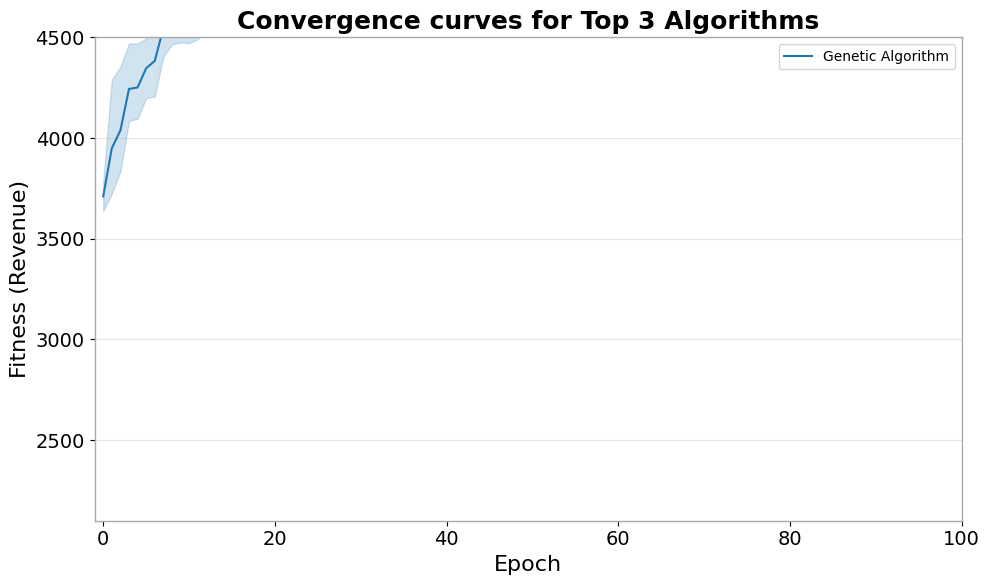

In [162]:
top_3_algos = ("Genetic Algorithm",
               "Particle Swarm Optimization",
               "Ant Colony Optimization Continuous (ACOR)")

# Create dataframe with fitness values for each individual of the population
df_history_top_3 = df_history[df_history['Algo'].isin(top_3_algos)]

sns_line_plot(df=df_history_top_3,
              x_data="Iteration",
              y_data="Fitness",
              hue="Algo",
              title="Convergence curves for Top 3 Algorithms",
              x_label="Epoch",
              y_label="Fitness (Revenue)",
              x_limit=(-1, 100),
              y_limit=(2100,4500),
              save_path=Path('../reports/mealpy/mealpy_convergence_5_seed_top_3.pdf'),
              fig_size=(10, 7))

In [163]:
df_history.head()

,Run,Algo,Iteration,Fitness,ExecutionTime,Discrete,Real,Diversity,Exploitation,Exploration
0,1,Genetic Algorithm,0,3710.824980,0.112169,"[True, True, True, True, True, True, True, Tru...","[1052, 1107, 1149, 876, 977, 1051, 901, 828, 9...",3.002632,0.000000,100.000000
1,1,Genetic Algorithm,1,3774.141684,0.112186,"[True, True, True, True, True, True, True, Tru...","[1053, 1104, 1148, 866, 974, 1051, 907, 825, 9...",2.951754,1.694420,98.305580
2,1,Genetic Algorithm,2,3919.408750,0.107511,"[True, True, True, True, True, True, True, Tru...","[1056, 1104, 1148, 866, 972, 1046, 907, 822, 9...",2.831579,5.696757,94.303243
3,1,Genetic Algorithm,3,4300.844275,0.106976,"[True, True, True, True, True, True, True, Tru...","[1056, 1104, 1148, 866, 972, 1046, 907, 819, 9...",2.668421,11.130587,88.869413
4,1,Genetic Algorithm,4,4300.844275,0.106278,"[True, True, True, True, True, True, True, Tru...","[1056, 1104, 1148, 866, 972, 1046, 907, 819, 9...",2.443860,18.609407,81.390593


In [164]:
algo_1_vals = df_history[df_history['Algo'] == 'Genetic Algorithm'] \
    .groupby(['Run', 'Iteration'])['Fitness'].last() \
    .groupby(level='Run').apply(list).sum()

algo_1_vals

[3710.8249796732375,
 3774.14168399554,
 3919.4087500597225,
 4300.844275267314,
 4300.844275267314,
 4381.586260871066,
 4381.586260871066,
 4381.586260871066,
 4473.93662604192,
 4473.93662604192,
 4473.93662604192,
 4473.93662604192,
 4624.366237193258,
 4697.7201996214135,
 4697.7201996214135,
 4697.7201996214135,
 4697.7201996214135,
 4707.775827188239,
 4723.013031556882,
 4768.144075783961,
 4768.144075783961,
 4768.144075783961,
 4768.144075783961,
 4768.144075783961,
 4768.144075783961,
 4769.920352246745,
 4779.107574567129,
 4802.585618623015,
 4802.585618623015,
 4825.436335471349,
 4825.436335471349,
 4830.786691037,
 4845.627728875839,
 4891.762263228194,
 4891.762263228194,
 4893.189311665937,
 4894.71988253818,
 4905.908311909441,
 4920.3961888114445,
 4940.1126158024745,
 4940.1126158024745,
 4940.1126158024745,
 4942.604018449381,
 4965.812780789625,
 4965.812780789625,
 4965.812780789625,
 4965.812780789625,
 4965.812780789625,
 4979.891150420805,
 4979.891150420805,

In [165]:
len(algo_1_vals)

250

In [166]:
N = 50  # Número de saltos que quieres aplicar

algo_1_vals = df_history[df_history['Algo'] == 'Simulated Annealing'] \
    .groupby(['Run', 'Iteration'])['Fitness'].last() \
    .groupby(level='Run').apply(lambda x: x.iloc[::N].tolist()).sum()

algo_1_vals

0.0

In [167]:
len(algo_1_vals)

TypeError: object of type 'numpy.float64' has no len()

In [168]:
# Confusion Matrix stadistical differences 

from scipy import stats

def get_epoch_last_fitness(df, name):
    algo_df = df[df['Algo'] == name]
    if name != 'Simulated Annealing':
        algo_vals = algo_df.groupby(['Run', 'Iteration'])['Fitness'].last().groupby(level='Run').apply(list).sum()
    else:
        algo_vals = algo_df.groupby(['Run', 'Iteration'])['Fitness'].last().groupby(level='Run').apply(lambda x: x.iloc[::N].tolist()).sum()
    return algo_vals
    
matrix_wilcoxon = []
matrix_p_values = []
for algo_name, algo in mp_algos.items():
    row_w = []
    row_p = []
    for algo_name_2, algo_2 in mp_algos.items():
        if algo_name == algo_name_2:
            row_w.append(np.nan)
            row_p.append(np.nan)
            continue
        
        algo_1_vals = get_epoch_last_fitness(df_history, algo_name)
        algo_2_vals = get_epoch_last_fitness(df_history, algo_name_2)
        stat, p_value = stats.wilcoxon(algo_1_vals, algo_2_vals)
        row_w.append(round(stat))
        row_p.append(round(p_value, 3))
    matrix_wilcoxon.append(row_w)
    matrix_p_values.append(row_p)

In [128]:
print("Wilcoxon Matrix")
df_wilcoxon = pd.DataFrame(matrix_wilcoxon, index=mp_algos.keys(), columns=mp_algos.keys())
print(df_wilcoxon)

Wilcoxon Matrix
                                                 Genetic Algorithm  \
Genetic Algorithm                                              NaN   
Particle Swarm Optimization                                  172.0   
Simulated Annealing                                            0.0   
Differential Evolution                                        59.0   
Ant Colony Optimization Continuous (ACOR)                     29.0   
Covariance Matrix Adaptation Evolution Strategy              970.0   
Artificial Bee Colony                                         63.0   
Grey Wolf Optimizer                                            1.0   
Whale Optimization Algorithm                                9918.0   
Hybrid Grey Wolf - Whale Optimization Algorithm                0.0   

                                                 Particle Swarm Optimization  \
Genetic Algorithm                                                      172.0   
Particle Swarm Optimization                          

In [129]:
print("P-Values Matrix")
df_p_values = pd.DataFrame(matrix_p_values, index=mp_algos.keys(), columns=mp_algos.keys())
print(df_p_values)

P-Values Matrix
                                                 Genetic Algorithm  \
Genetic Algorithm                                              NaN   
Particle Swarm Optimization                                    0.0   
Simulated Annealing                                            0.0   
Differential Evolution                                         0.0   
Ant Colony Optimization Continuous (ACOR)                      0.0   
Covariance Matrix Adaptation Evolution Strategy                0.0   
Artificial Bee Colony                                          0.0   
Grey Wolf Optimizer                                            0.0   
Whale Optimization Algorithm                                   0.0   
Hybrid Grey Wolf - Whale Optimization Algorithm                0.0   

                                                 Particle Swarm Optimization  \
Genetic Algorithm                                                      0.000   
Particle Swarm Optimization                          

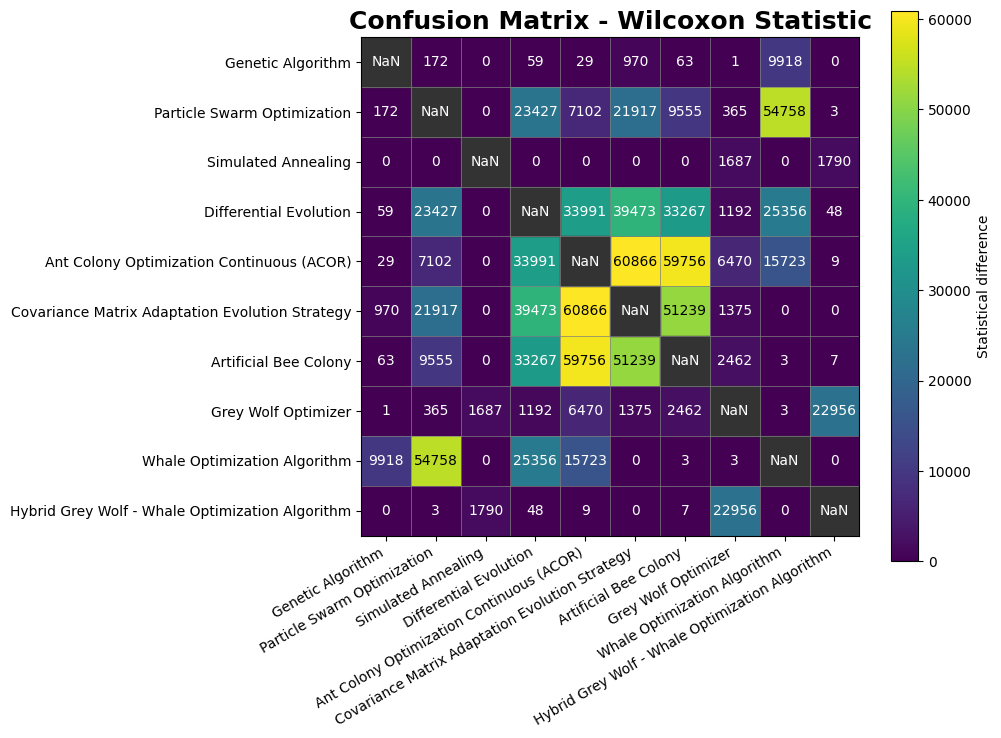

In [135]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(df_wilcoxon, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Statistical difference')
plt.xticks(range(10), df_wilcoxon.columns, rotation=30, ha='right')
plt.yticks(range(10), df_wilcoxon.index)
plt.title('Confusion Matrix - Wilcoxon Statistic', fontweight='bold', fontsize=18)

for i in range(df_wilcoxon.shape[0]):
    for j in range(df_wilcoxon.shape[1]):
        value = df_wilcoxon.iloc[i, j]
        if np.isnan(value):
            # Manejo especial para NaN
            display_value = "NaN"
            text_color = 'white'  # Color negro para NaN
            rect_color = (0.2, 0.2, 0.2)  # Gris oscuro
            plt.gca().add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, color=rect_color))
        else:
            display_value = f"{int(value)}"
            text_color = 'black' if value > 50000 else 'white'
        
        plt.text(j, i, display_value, ha='center', va='center', color=text_color)
        
ax = plt.gca()
ax.set_xticks(np.arange(-0.5, 10, 1), minor=True)
ax.set_yticks(np.arange(-0.5, 10, 1), minor=True)
ax.grid(which="minor", color='gray', linestyle='-', linewidth=0.5)
ax.tick_params(which="minor", size=0)

plt.tight_layout()
plt.savefig("../figures/wilcoxon_confusion_matrix_5_seed.pdf", format='pdf', dpi=300, bbox_inches='tight', transparent=True)

plt.show()

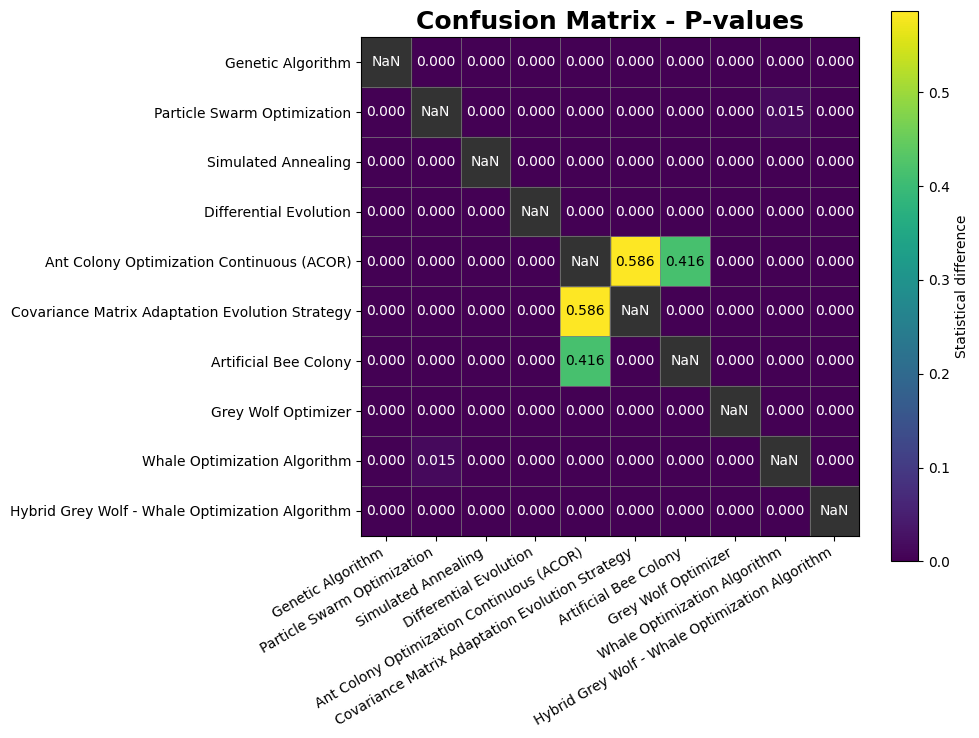

In [125]:
# Visualización con matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(df_p_values, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Statistical difference')
plt.xticks(range(10), df_p_values.columns, rotation=30, ha='right')
plt.yticks(range(10), df_p_values.index)
plt.title('Confusion Matrix - P-values', fontweight='bold', fontsize=18)

for i in range(df_p_values.shape[0]):
    for j in range(df_p_values.shape[1]):
        value = df_p_values.iloc[i, j]
        if np.isnan(value):
            # Manejo especial para NaN
            display_value = "NaN"
            text_color = 'white'  # Color negro para NaN
            rect_color = (0.2, 0.2, 0.2)  # Gris oscuro
            plt.gca().add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, color=rect_color))
        else:
            display_value = f"{value:.3f}"
            text_color = 'black' if value > 0.3 else 'white'
        
        plt.text(j, i, display_value, ha='center', va='center', color=text_color)
        
ax = plt.gca()
ax.set_xticks(np.arange(-0.5, 10, 1), minor=True)
ax.set_yticks(np.arange(-0.5, 10, 1), minor=True)
ax.grid(which="minor", color='gray', linestyle='-', linewidth=0.5)
ax.tick_params(which="minor", size=0)

plt.tight_layout()
plt.savefig("../figures/p_values_confusion_matrix_5_seed.pdf", format='pdf', dpi=300, bbox_inches='tight', transparent=True)

plt.show()

In [36]:
stat, p_value = stats.wilcoxon(genetic_revenues_mean, acor_revenues_mean)
print(f"Estadístico de Wilcoxon: {stat}, Valor p: {p_value}")

Estadístico de Wilcoxon: 0.0, Valor p: 0.0625


In [169]:
# Select a solution from df_history:
algo_name = 'Genetic Algorithm'
run = 5
iteration = 49

filtered_row = df_history[
    (df_history["Algo"] == algo_name) &
    (df_history["Run"] == run) &
    (df_history["Iteration"] == iteration)
]

# Get values from columns "Real" & "Discrete"
if not filtered_row.empty:
    real_value = filtered_row["Real"].iloc[0]
    discrete_value = filtered_row["Discrete"].iloc[0]
    ga_best_sol = Solution(real=real_value, discrete=discrete_value)
    print(f"Real: {real_value}, Discrete: {discrete_value}")
else:
    print("Row not found matching the provided parameters.")

Real: [1059 1108 1145  872  972 1046  904  828  913 1354  730  127  210  279
  479  522  621  692  925  739  180  393  461  508  932  967 1038 1104
 1142 1159 1192 1260 1313 1349  410  470  510  266  323  369  530  573
 1079 1189 1252 1295  550  614  654 1239  463  528  570 1281  895  996
 1064], Discrete: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]


In [172]:
sm = RevenueMaximization(requested_schedule=requested_schedule,
                         revenue_behaviour=revenue_behaviour,
                         line=line,
                         safe_headway=10)

services = sm.update_supply(path=generator_save_path,
                            solution=ga_best_sol)

sm.update_schedule(solution=ga_best_sol)

filtered_services = {}
for i, service in enumerate(sm.updated_schedule):
    if ga_best_sol.discrete[i]:
        filtered_services[service] = sm.updated_schedule[service]

#plotter = TrainSchedulePlotter(filtered_services, line)
#plotter.plot(plot_security_gaps=True, save_path=Path('../figures/updated.pdf'))

tt_file_name = f'{supply_config_path.stem}_gsa'
print(supply_save_path, tt_file_name)
SupplySaver(services).to_yaml(filename=f'{tt_file_name}.yml', save_path=supply_save_path)

# Copy previous file in reports
shutil.copyfile(f"{supply_save_path}{tt_file_name}.yml", reports_path / f'{tt_file_name}_25.yml')

supply_config_file = Path(f'{supply_save_path}{tt_file_name}.yml')

../configs/mealpy/ supply_config_gsa


In [173]:
final_supply = Supply.from_yaml(supply_config_file)

/Users/uclm/PycharmProjects/GSA_M/venv/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


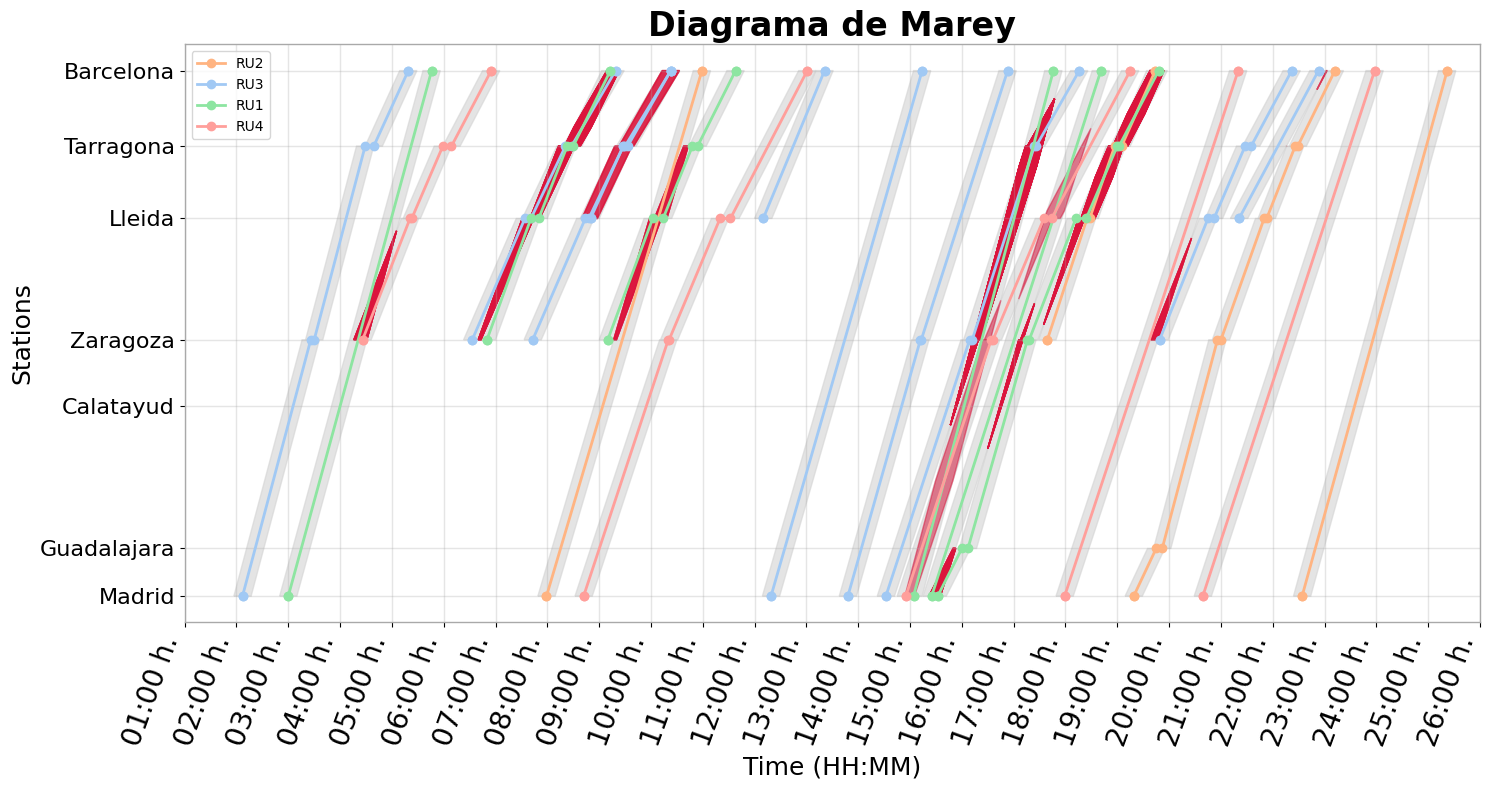

In [174]:
plot_marey_chart(requested_supply=final_supply,
                 colors_by_tsp=True, 
                 main_title="Diagrama de Marey",
                 plot_security_gaps=True,
                 security_gap=10,
                 save_path=Path('../reports/mealpy/marey_chart_ga_25.pdf'))

In [38]:
shutil.copyfile(f"{supply_save_path}{tt_file_name}.yml", reports_path / f'mealpy/{tt_file_name}_25.yml')

PosixPath('../reports/mealpy/supply_config_gsa_25.yml')

In [30]:
#!snakeviz profile.pstat